<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

# Personalizado por Marcella Café

---

# Análise dos Dados do Airbnb - *Buenos Aires*

<center><img alt="Buenos Aires" width="80%" src="https://www.remessaonline.com.br/blog/wp-content/uploads/2020/04/Compras-em-Buenos-Aires-veja-o-que-%C3%A9-vantajoso-comprar-na-Argentina_559272994.jpg"></center>

Capital da Argentina e do Tango, Buenos Aires é uma das cidades mais visitadas do país. A cidade possui o mesmo fuso horário de Brasília e um ar que consegue ser ao mesmo tempo parecido e diferente do que se vê pelo Brasil. Buenos Aires tem muito a oferecer para os turistas que, é claro, sempre se encantam após
cada passeio. Seja no quesito história, na culinária, na grande quantidade de locais para conhecer e aproveitar durante a sua estadia ou ainda nas belas noites repletas de tango. 

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Buenos Aires, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2021-01-29/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel  
* `name` - nome da propriedade anunciada 
* `host_id` - número de id do proprietário (anfitrião da propriedade)
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listing_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias 

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

id                                           name  host_id host_name  \
0   6283                                    Casa Al Sur    13310    Pamela   
1  11508             Amazing Luxurious Apt-Palermo Soho    42762   Candela   
2  12463            Room in Recoleta - awesome location    48799      Matt   
3  13095  Standard Room at Palermo Viejo B&B w pvt Bath    50994     Ariel   
4  13096             Standard Room in Palermo Viejo B&B    50994     Ariel   

   neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0                  NaN     Balvanera -34.60367  -58.40875  Entire home/apt   
1                  NaN       Palermo -34.58184  -58.42415  Entire home/apt   
2                  NaN      Recoleta -34.59761  -58.39468     Private room   
3                  NaN       Palermo -34.59348  -58.42949     Private room   
4                  NaN       Palermo -34.59348  -58.42949     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   4364               3                  1  2011-01-31               0.01   
1   5233               2                 26  2019-11-28               0.25   
2   2357               1                 20  2017-12-11               0.15   
3   2622               1                  1  2018-12-18               0.04   
4   2622               1                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  
0                               1               365  
1                               1                30  
2                               1               365  
3                               7               365  
4                               7               365

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna,

Este *dataset* utilizado é a versão "resumida" obtida no Airbnb por meio do [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 20558
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
As variáveis `reviews_per_month` e `last_review` possuem 30% dos seus valores faltantes.
As variáveis `host_name` e `name` têm aproximadamente 1% dos valores nulos.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.302753
last_review                       0.302753
host_name                         0.000632
name                              0.000243
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

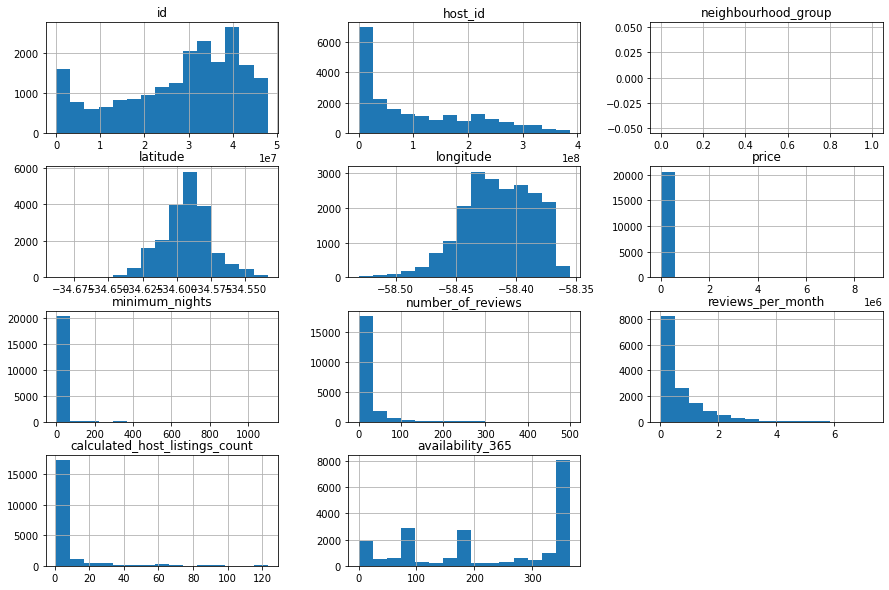

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

In [7]:
pd.set_option('float_format', '{:f}'.format)

# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

price  minimum_nights  number_of_reviews  reviews_per_month  \
count   20558.000000    20558.000000       20558.000000       14334.000000   
mean     4933.338652        6.558955          16.346872           0.681464   
std     64939.946870       20.410624          33.530968           0.809547   
min         0.000000        1.000000           0.000000           0.010000   
25%      1573.000000        2.000000           0.000000           0.130000   
50%      2500.000000        3.000000           3.000000           0.380000   
75%      3928.000000        5.000000          17.000000           0.940000   
max   8728293.000000     1100.000000         500.000000           7.310000   

       calculated_host_listings_count  availability_365  
count                    20558.000000      20558.000000  
mean                         7.579434        227.945763  
std                         17.485521        133.307178  
min                          1.000000          0.000000  
25%                          1.000000         90.000000  
50%                          2.000000        248.000000  
75%                          4.000000        364.000000  
max                        123.000000        365.000000

Ao analisarmos os histogramas acima e o resumo estatístico, é possível perceber que algum variáveis possuem valores que destoam do resto.

* `availability_365`: há imóveis que não estão disponíveis para aluguel nenhum dia do ano.
* `minimum_nights`: há imóveis que o mínimo de noite é de 1000 dias, ou seja, aproximadamente 3 anos.
* `price`:  há imóveis com o valor de diária até 8728293 Pesos Argentinos, cerca de R$ 536435,69.

Podemos perceber que:
  
* 75% dos imóveis estão disponíveis praticamente durante todo o ano.
* 75% dos anfitriôes exigem no aluguel de no mínimo 5 noites.
* 75% dos imóveis possuem uma diária de 3928 Pesos Argentinos.

#### Limpeza de Dados ####

Observando o cenário levantado do nosso dataset, vamos precisar retirar alguns dados que estão distorcendo nossas informações estatísticas.

* Remover valores da coluna `availability_365` que sejam iguais a zero, pois o imóvel deve estar disponível pelo menos um dia no ano.
* Remover valores da coluna `minimum_nights` acima de 30, pois não temos interesse em alugueis acima de 1 mês.
* Remover valores da coluna `price` que são baixo ou alto demais.
* Remover a coluna `neighbourhood_group`, pois 100% dos são dados são nulos.

A regra adotada para o valor baixo e alto do preço será baseado na seguinte regra:

* Valor baixo: valores abaixo do percentil 1%
* Valor alto: valores acima de 2 X percentil 75%



In [10]:
# Resumo estatístico com o percentil de 1%
df[['availability_365', 'minimum_nights', 'price']].describe(percentiles=[0.01, .25, .5, .75])

availability_365  minimum_nights          price
count      20558.000000    20558.000000   20558.000000
mean         227.945763        6.558955    4933.338652
std          133.307178       20.410624   64939.946870
min            0.000000        1.000000       0.000000
1%             0.000000        1.000000     770.140000
25%           90.000000        2.000000    1573.000000
50%          248.000000        3.000000    2500.000000
75%          364.000000        5.000000    3928.000000
max          365.000000     1100.000000 8728293.000000

Com base nos resumo estatístico acima assumimos os seguintes valores:

* Valor baixo: 771 Pesos Argentinos
* Valor alto: 7856 Pesos Argentinos

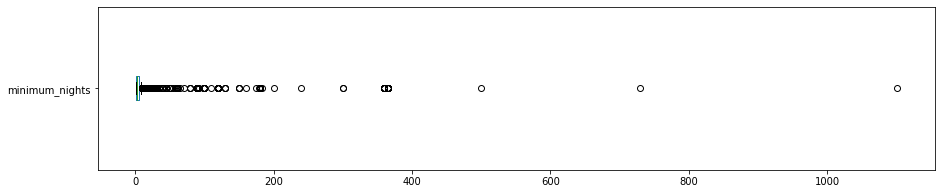

minimum_nights: valores acima de 30:
357 entradas
1.7366%


In [19]:
# Boxplot da variável minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

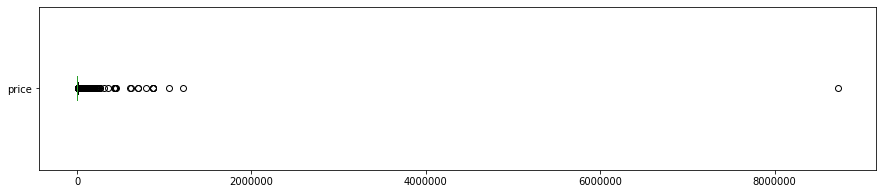


price: valores abaixo de 771
206 entradas
1.0020%


In [22]:
# Boxplot da variável price menor que 771
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 771 para price
print("\nprice: valores abaixo de 771")
print("{} entradas".format(len(df[df.price < 771])))
print("{:.4f}%".format((len(df[df.price < 771]) / df.shape[0])*100))

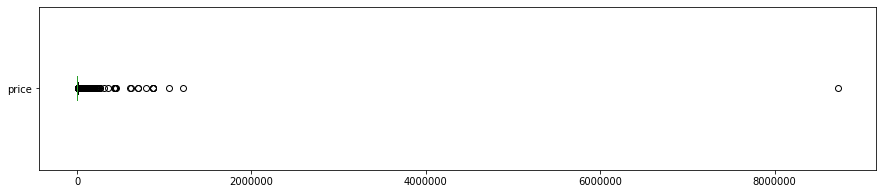


price: valores acima de 7856
1694 entradas
8.2401%


In [20]:
# Boxplot da variável price maior 7856
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 7856 para price
print("\nprice: valores acima de 7856")
print("{} entradas".format(len(df[df.price > 7856])))
print("{:.4f}%".format((len(df[df.price > 7856]) / df.shape[0])*100))

In [13]:
# Criando uma cópia do nosso dataset
df_clean = df.copy()

# Removendo valores da coluna availability_365 que sejam iguais a zero
df_clean.drop(df_clean[df_clean.availability_365 == 0].index, axis = 0, inplace = True)

# Remover valores da coluna minimum_nights maiores que 30
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace = True)

# Remover valores da coluna price menores que 771 e maiores que 7856
df_clean.drop(df_clean[df_clean.price < 771].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.price > 7856].index, axis = 0, inplace = True)

# Remover a coluna neighbourhood_group
df_clean.drop('neighbourhood_group', axis = 1, inplace = True)


In [14]:
# identificar o volume de dados do DataFrame após a limpeza nos dados
print("Entradas:\t {}".format(df_clean.shape[0]))
print("Variáveis:\t {}".format(df_clean.shape[1]))

Entradas:	 17312
Variáveis:	 15


In [15]:
# Porcentagem de dados disponíveis após a limpeza dos dados
((df_clean.shape[0] / df.shape[0]) * 100)

84.21052631578947

Após a limpeza dos dados, permanecemos com aproximadamente 84.2% dos dados iniciais. Ou seja, 15.8% dos dados do dataset inicial eram *outliers*.

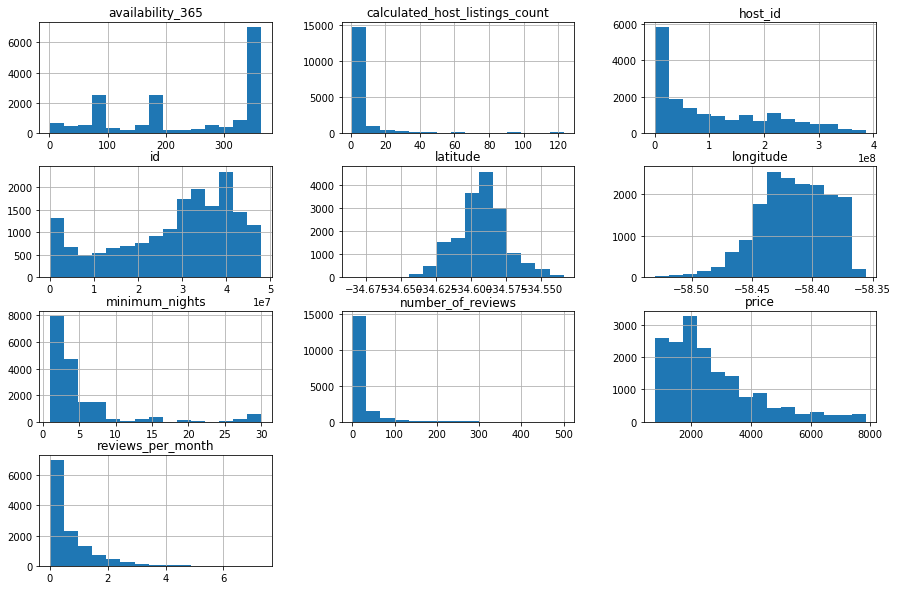

In [16]:
# Distribuição dos dados da variáveis numéricas após a limpeza dos dados
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [18]:
# ver a média da coluna `price``
df_clean.groupby(['room_type']).price.mean().sort_values(ascending = False)

room_type
Hotel room        2970.256410
Entire home/apt   2962.503682
Private room      1775.282542
Shared room       1391.482667
Name: price, dtype: float64

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

Criar uma matriz de correlação
Gerar um heatmap a partir dessa matriz, usando a biblioteca `seaborn`

In [23]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

price  minimum_nights  number_of_reviews  \
price                           1.000000       -0.041558          -0.019213   
minimum_nights                 -0.041558        1.000000          -0.079254   
number_of_reviews              -0.019213       -0.079254           1.000000   
reviews_per_month              -0.061936       -0.125357           0.770103   
calculated_host_listings_count  0.157758        0.107573          -0.063793   
availability_365                0.074631        0.008275          -0.007808   

                                reviews_per_month  \
price                                   -0.061936   
minimum_nights                          -0.125357   
number_of_reviews                        0.770103   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.043125   
availability_365                        -0.093491   

                                calculated_host_listings_count  \
price                                                 0.157758   
minimum_nights                                        0.107573   
number_of_reviews                                    -0.063793   
reviews_per_month                                    -0.043125   
calculated_host_listings_count                        1.000000   
availability_365                                      0.025731   

                                availability_365  
price                                   0.074631  
minimum_nights                          0.008275  
number_of_reviews                      -0.007808  
reviews_per_month                      -0.093491  
calculated_host_listings_count          0.025731  
availability_365                        1.000000

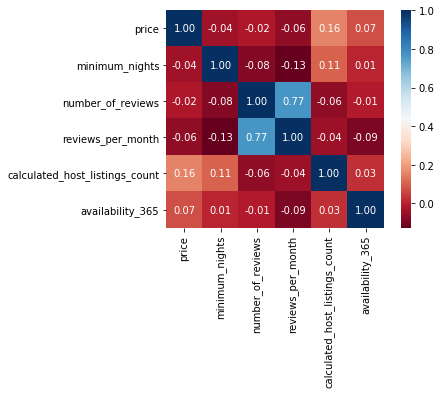

In [24]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [25]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    13578
Private room        3242
Shared room          375
Hotel room           117
Name: room_type, dtype: int64

In [26]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt   0.784311
Private room      0.187269
Shared room       0.021661
Hotel room        0.006758
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.



In [27]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Villa Soldati     5197.666667
Puerto Madero     4944.146341
Floresta          3099.083333
Villa Riachuelo   3066.000000
Palermo           3039.978590
Retiro            2895.604478
Nuñez             2860.423188
Recoleta          2846.685919
Belgrano          2799.067031
Liniers           2680.066667
Name: price, dtype: float64

Temos que o top 5 em relação a média de preço por bairros é:

* Villa Soldati     5197.66 Pesos Argentinos
* Puerto Madero     4944.14 Pesos Argentinos
* Floresta          3099.08 Pesos Argentinos
* Villa Riachuelo   3066.00 Pesos Argentinos
* Palermo           3039.97 Pesos Argentinos

In [30]:
# Contar a quantidade de imóveis em cada bairro

df_clean.neighbourhood.value_counts()

Palermo              5278
Recoleta             2926
San Nicolas          1100
Retiro                938
Balvanera             873
Belgrano              731
Monserrat             718
Almagro               676
Villa Crespo          595
San Telmo             536
Nuñez                 345
Colegiales            339
Caballito             303
Chacarita             267
Constitucion          242
Villa Urquiza         155
Puerto Madero         123
San Cristobal         116
Barracas              108
Boca                   97
Saavedra               97
Boedo                  84
Flores                 81
Coghlan                73
Villa Ortuzar          61
Villa Devoto           49
Parque Chacabuco       47
Parque Patricios       46
Villa Del Parque       39
Villa Pueyrredon       28
Parque Chas            26
Villa Santa Rita       25
Floresta               24
Paternal               20
Villa Gral. Mitre      20
Velez Sarsfield        18
Monte Castro           16
Agronomia              15
Villa Luro  

Verificando a quantidade de imóveis disponíveis por bairros, temos o seguinte para o top 5 aluguéis com média de diária mais alta:

* Villa Soldati     3 imóveis
* Puerto Madero     123 imóveis
* Floresta          24 imóveis
* Villa Riachuelo   1 imóveis
* Palermo           5278 imóveis

O bairro mais caro de acordo com a análise é o Villa Soldati que possui apenas 3 imóveis anunciados, seguido pelo Puerto Madero que possui 123 imóveis anunciados. 

In [31]:
# Checando os imóveis de Villa Soldati
df_clean[df_clean.neighbourhood == 'Villa Soldati']

id                                              name    host_id  \
11140  32548725                      Departamento amplio y cómodo  226116702   
12488  34492123        Muy buen hambiente..tranquilidad y espacio  260348454   
12746  34811527  Departamento capital federal 4 ambientes grandes  262448759   

      host_name  neighbourhood   latitude  longitude        room_type  price  \
11140     Aneth  Villa Soldati -34.661030 -58.436030  Entire home/apt   5233   
12488     Nilsa  Villa Soldati -34.657190 -58.442280     Private room   4000   
12746       Fer  Villa Soldati -34.666280 -58.444940     Private room   6360   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
11140               1                  0         NaN                nan   
12488               1                  0         NaN                nan   
12746               1                  0         NaN                nan   

       calculated_host_listings_count  availability_365  
11140                               2               179  
12488                               1               364  
12746                               1               365

Analisando os dados do Villa Soldati, podemos perceber:

* Existem 2 quartos privados para aluguel, porém o diária dele é um valor consideravelmente alto comparado com a média para esse tipo de hospedagem que é de 1775.28 Pesos Argentino.
* Existe uma casa/apartamento inteiro para aluguel, que também possui um valor consideravelmente alto comparado com a média para esse tipo de hospedagem que é de 2962.50 Pesos Argentino.
* Nenhuma das hospedagens desse bairro possui alguma avaliação.

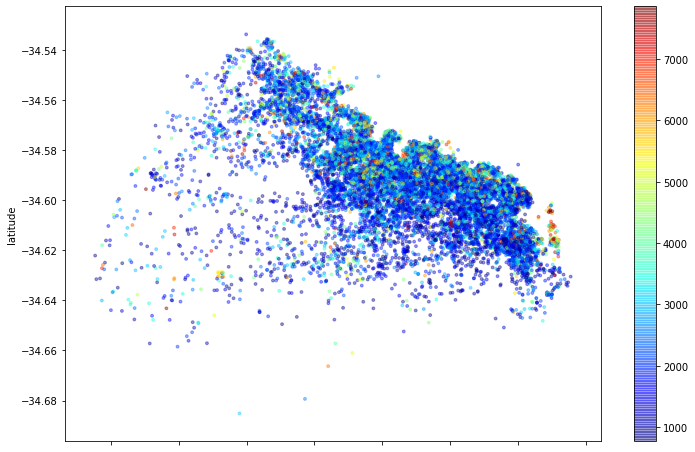

In [28]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [29]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

4.683109981515711

## Conclusões

Buenos Aires é uma cidade que oferece boas diversões e variedades para turistas.

Com a análise realizada foi possível chegar as seguintes Conclusões:

* As variáveis `availability_365`, `minimum_nights`, `price` apresentam *outliers*.
* Algumas localidades possuem poucos imóveis, o que pode distorcer as informações estatísticas de alguns atributos.
* A maioria dos imóveis disponíveis para locação são do tipo Casa/Apartamento inteiro.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.



